<center>
    
# [Компьютерное зрение](https://cogmodel.mipt.ru/wiki/index.php/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5)

## <center> Семинар 6 - Детекция и сопоставление ключевых точек

<a target="_blank" href="https://colab.research.google.com/github/alexmelekhin/cv_course_2023/blob/main/seminars/seminar_06/Seminar_6.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

***

In [118]:
import numpy as np
from scipy import ndimage, stats
from time import perf_counter
import cv2
import matplotlib.pyplot as plt
from itertools import product
import hashlib

sha = lambda a: hashlib.sha256(a.tobytes()).hexdigest()

# Данные

Изображения взяты из папки samples репозитория opencv: https://github.com/opencv/opencv/tree/4.x/samples/data

In [119]:
!mkdir data
!wget https://github.com/opencv/opencv/raw/4.x/samples/data/box.png -O ./data/box.png
!wget https://github.com/opencv/opencv/raw/4.x/samples/data/box_in_scene.png -O ./data/box_in_scene.png

mkdir: cannot create directory ‘data’: File exists
--2023-04-02 18:46:12--  https://github.com/opencv/opencv/raw/4.x/samples/data/box.png
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/4.x/samples/data/box.png [following]
--2023-04-02 18:46:12--  https://raw.githubusercontent.com/opencv/opencv/4.x/samples/data/box.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50728 (50K) [image/png]
Saving to: ‘./data/box.png’

./data/box.png      100%[===================>]  49.54K  --.-KB/s    in 0.003s  

2023-04-02 18:46:12 (14.8 MB/s) - ‘./data/box.png’ saved [50728/50728]

--2023-04-02 

In [120]:
img_1 = cv2.imread('data/box.png', cv2.IMREAD_GRAYSCALE)

img_2 = cv2.imread('data/box_in_scene.png', cv2.IMREAD_GRAYSCALE)

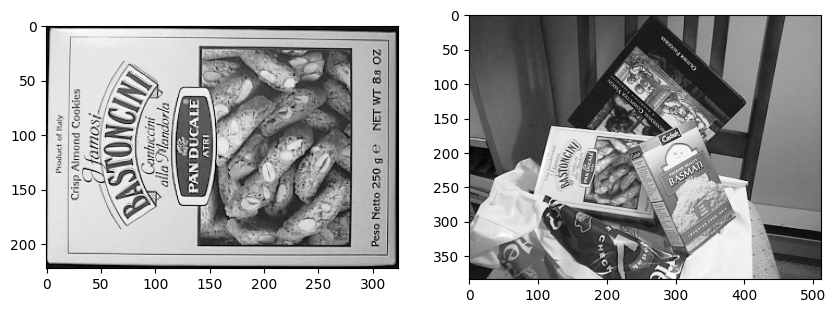

In [121]:
plt.figure(figsize=[10, 10])
plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='Greys_r')
plt.subplot(1, 2, 2)
plt.imshow(img_2, cmap='Greys_r')

In [122]:
img_1.shape

(223, 324)

# Извлечение ключевых точек: ORB

- Rublee, Ethan, et al. "ORB: An efficient alternative to SIFT or SURF." 2011 International conference on computer vision. Ieee, 2011. [[pdf]](https://d1wqtxts1xzle7.cloudfront.net/63685366/ORB-_An_efficient_alternative_to_SIFT_or_SURF20200619-118758-d5kgfr-libre.pdf?1592635646=&response-content-disposition=inline%3B+filename%3DORB_an_efficient_alternative_to_SIFT_or.pdf&Expires=1678814267&Signature=bylBe0Mp4cefN84Bzcx1RZP0mUe7ZGLkYFAYAZ1~rbgXQtNFXbMryWE-FcG~sYLMhk9hKdwGVzvgLYGb-OZazU5dcsurJl7Fw4Csg7lThUE8Kh~SYK9fqG8XrMpQlUn3hIMrobrTH9qvAMeVBNs0ZCTPmvFI5o04OW73ysIS6BoX0nsLMUxtYZa8zvIJvZJSey6POYB8-IXQO8Jvu0e3mvzwViUXxvByCJwycTHC1oObfH6mFU6cg4A0SPUNdiKdmZOvx0nmhvY96NRuu7aMX8I6mrU6x02NBQZtTRebP3RoQqtBhr-5X~c40uxY-big5AnZu2fc-qP8OWZ0lnx~xg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

[Туториал на medium](https://medium.com/@deepanshut041/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf)



In [123]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp_1, des_1 = orb.detectAndCompute(img_1, None)
kp_2, des_2 = orb.detectAndCompute(img_2, None)

Каждая ключевая точка характеризуется:
1. angle - углом, что позволяет вычислять дескрипторы, инвариантные к повороту,
2. octave - октавой, определяющей масштаб, на котором была обнаружена ключевая точка,
3. pt - субпиксельными координатами этой ключевой точки на изображении, 
4. response - величиной отклика детектора,
5. size - размером (для визуализации величины отклика)

In [124]:
print('type(kp_1) =', type(kp_1))
print('len(kp_1) =', len(kp_1))
print()
print('kp_1[0] =', kp_1[0])
print()
print('kp_1[0].angle = ', kp_1[0].angle)
print('kp_1[0].octave = ', kp_1[0].octave)
print('kp_1[0].pt = ', kp_1[0].pt)
print('kp_1[0].response = ', kp_1[0].response)
print('kp_1[0].size = ', kp_1[0].size)

type(kp_1) = <class 'tuple'>
len(kp_1) = 453

kp_1[0] = < cv2.KeyPoint 0x7f9f9cbed840>

kp_1[0].angle =  211.65310668945312
kp_1[0].octave =  0
kp_1[0].pt =  (132.0, 90.0)
kp_1[0].response =  0.003914095461368561
kp_1[0].size =  31.0


Дескрипторы - это вектора фиксированной длины для каждой ключевой точки

In [125]:
print('type(des_1) =', type(des_1))
print('des_1.shape =', des_1.shape)
print('des_1.dtype =', des_1.dtype)

type(des_1) = <class 'numpy.ndarray'>
des_1.shape = (453, 32)
des_1.dtype = uint8


In [126]:
img_1_kp = cv2.drawKeypoints(img_1, kp_1, None, (255, 0, 0), 4)
img_2_kp = cv2.drawKeypoints(img_2, kp_2, None, (255, 0, 0), 4)

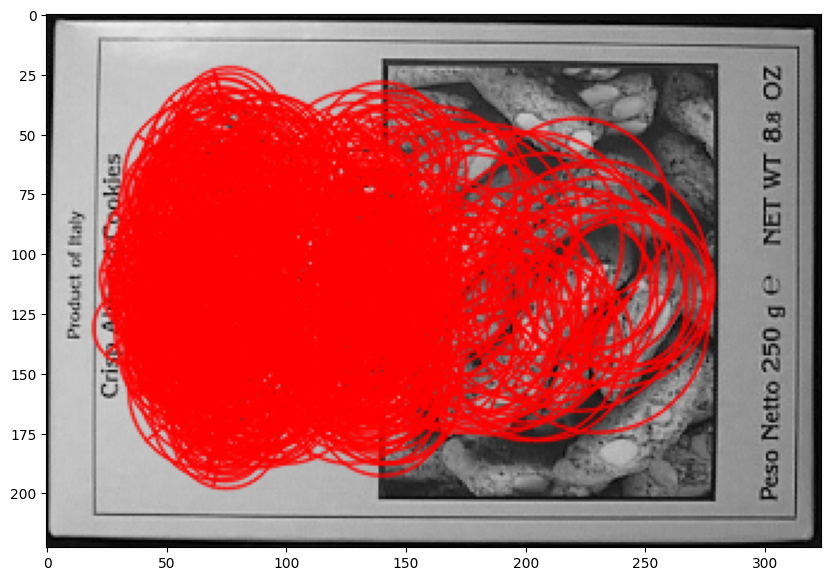

In [127]:
plt.figure(figsize=[10, 10])
plt.imshow(img_1_kp)

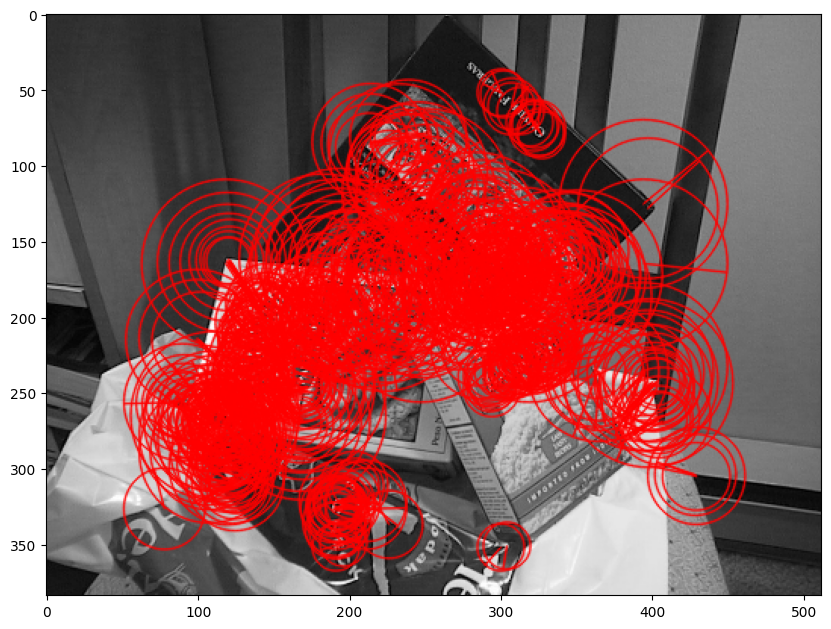

In [128]:
plt.figure(figsize=[10, 10])
plt.imshow(img_2_kp)

# Вопрос 1

О чем говорит наличие концентрических окружностей?

**Ответ: Алгоритм выявил ключевые точки**

# Вопрос 2

Каким способом можно избавиться от избыточных близких ключевых точек? И нужно ли это делать?

**Ответ: Да Для каждого элемента списка брать несколько наиболее близких точек, Может пригодиться если нужно быстрее выполнять программу**

# Сопоставление ключевых точек: Brute-Force

[Туториал OpenCV по Feature Matching](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html#)

Для сопоставления ключевых точек методом грубого перебора можно использовать функцию `cv2.BFMatcher()`.

Она принимает на вход два аргумента:
1. `normType` - какая меру дистанции между дескрипторами будет использоваться
2. `crossCheck` - при значении `True` возвращает только пары (i, j), такие, что i-й дескриптор из первого имеет в качестве наилучшего совпадения j-й дескриптор из второго множества (и наоборот).

In [129]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck=True)
matches = matcher.match(des_1, des_2)

# top-20 matches
matches = sorted(matches, key=lambda x: x.distance)
matches = matches[:20]

In [130]:
img_matches = cv2.drawMatches(img_1, kp_1, img_2, kp_2, matches, None, flags=2)

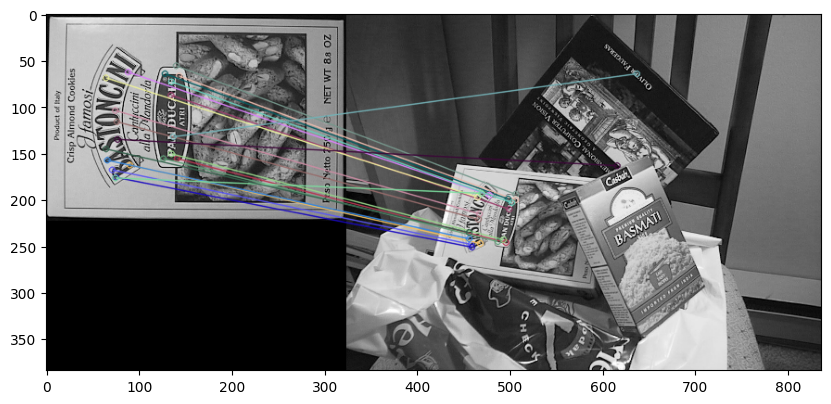

In [131]:
plt.figure(figsize=[10, 10])
plt.imshow(img_matches)

# Выравнивание изображений

In [132]:
src_pts = np.float32([ kp_1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp_2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [133]:
img_1_transformed = cv2.warpPerspective(img_1, M, img_2.shape[0:2][::-1])

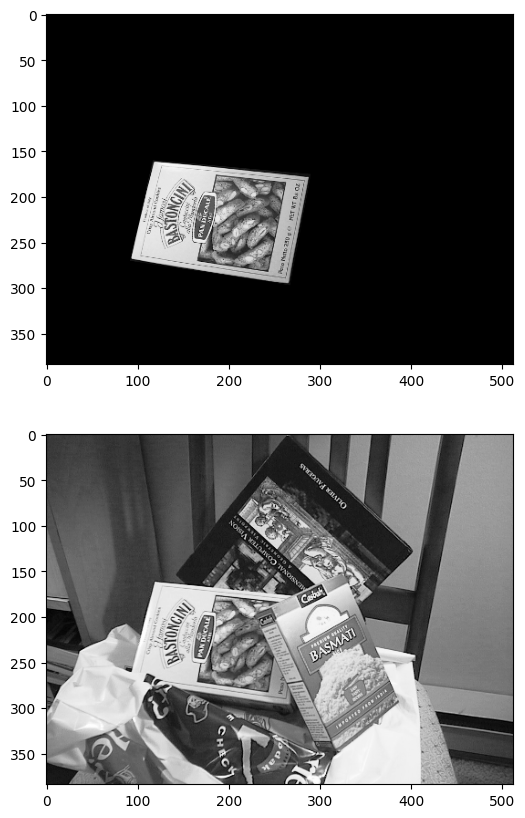

In [134]:
plt.figure(figsize=[20, 10])
plt.subplot(2, 1, 1)
plt.imshow(img_1_transformed, cmap='Greys_r')
plt.subplot(2, 1, 2)
plt.imshow(img_2, cmap='Greys_r')

# SURF

Основные отличия между детекторами ORB (Oriented FAST and Rotated BRIEF) и SURF (Speeded Up Robust Features) заключаются в следующем:

- Скорость: ORB быстрее, чем SURF. Это связано с тем, что ORB использует бинарный дескриптор и более быстрый алгоритм обнаружения ключевых точек (FAST), в то время как SURF использует дескриптор с плавающей запятой и более вычислительно сложный алгоритм обнаружения ключевых точек.
- Инвариантность к масштабу: SURF обладает более высокой инвариантностью к масштабу, чем ORB. Это связано с тем, что SURF использует представление изображения в масштабированном виде (scale-space representation of the image) для обнаружения ключевых точек на разных масштабах, тогда как ORB использует фиксированный размер пирамиды масштабов (fixed-size scale pyramid).
- Инвариантность к повороту: ORB более инвариантен к повороту, чем SURF. ORB вычисляет дескриптор, который инвариантен к повороту, в то время как SURF вычисляет дескриптор, который не полностью инвариантен к повороту, но может быть сделан таковым с помощью дополнительных вычислений.
- Устойчивость к шуму и размытию: SURF в целом более устойчив к шуму и размытию, чем ORB, из-за использования в процессе обнаружения ключевых точек гауссовского фильтра.

[Туториал на medium](https://medium.com/@deepanshut041/introduction-to-surf-speeded-up-robust-features-c7396d6e7c4e)

**Основным заданием** будет ознакомиться со статьей по [SURF](https://lirias.kuleuven.be/retrieve/78517) и дополнить недостающие строчки кода. Во многих местах достаточно одной строки, реализующей ту или иную математическую операцию на numpy.

Сначала ознакомьтесь со вспомогательными функциями:

In [135]:
def integral_image(image):
    '''Вычисляет интегральное изображение
    '''
    return image.cumsum(axis=0).cumsum(axis=1)


def partial_sums(integral, x, y, w, h, kernel_size, spatial_step):
    '''Вычисляет свертку изображения на основе интегрального изображения.
    Ядро свертки имеет размер kernel_size x kernel_size и движется
    с шагом spatial_step.
    
    По изображению движется ядро размера kernel_size x kernel_size
    с шагом spatial_step. Это ядро состоит из нулей, кроме прямоугольника
    с верхним левым углом (x, y) и размерами (ширина, высота) = (w, h).
    '''
    H, W = integral.shape[:2]
    integral = np.pad(integral, 1)
    x, y = x + 1, y + 1

    y1 = y - 1
    y2 = H - (kernel_size - y1) + 1
    x1 = x - 1
    x2 = W - (kernel_size - x1) + 1
    b1 = integral[y1:y2:spatial_step, x1:x2:spatial_step]

    y1 = y - 1
    y2 = H - (kernel_size - y1) + 1
    x1 = x + w - 1
    x2 = W - (kernel_size - x1) + 1
    b2 = integral[y1:y2:spatial_step, x1:x2:spatial_step]

    y1 = y + h - 1
    y2 = H - (kernel_size - y1) + 1
    x1 = x - 1
    x2 = W - (kernel_size - x1) + 1
    b3 = integral[y1:y2:spatial_step, x1:x2:spatial_step]

    y1 = y + h - 1
    y2 = H - (kernel_size - y1) + 1
    x1 = x + w - 1
    x2 = W - (kernel_size - x1) + 1
    b4 = integral[y1:y2:spatial_step, x1:x2:spatial_step]

    return b4 - b2 - b3 + b1

# Задание 1: Вспомогательные функции

Допишите оператор return в тех функциях, где это необходимо.

In [136]:
def Dx(integral, kernel_size):
    '''Первая производная по X
    '''
    left = partial_sums(integral, 0, 0, kernel_size // 2, kernel_size, kernel_size, 1)
    right = partial_sums(integral, kernel_size // 2, 0, kernel_size // 2, kernel_size, kernel_size, 1)
    return -left + right  # <============1==============


def Dy(integral, kernel_size):
    '''Первая производная по Y
    '''
    up = partial_sums(integral, 0, 0, kernel_size, kernel_size // 2, kernel_size, 1)
    bottom = partial_sums(integral, 0, kernel_size // 2, kernel_size, kernel_size // 2, kernel_size, 1)
    return -up + bottom  # <============2==============


def Dxx(integral, kernel_size, spatial_step):
    '''Вторая производная по X
    '''
    shift = round(kernel_size * 2 / 9)
    h = kernel_size - 2 * shift

    w1 = round(kernel_size / 3)
    w2 = round(kernel_size / 3)
    w3 = kernel_size - w1 - w2

    c1 = (3 * 5) / (w1 * h)
    c2 = (3 * 5) / (w2 * h)
    c3 = (3 * 5) / (w3 * h)

    left = partial_sums(integral, 0, shift, w1, h, kernel_size, spatial_step)
    center = partial_sums(integral, 0 + w1, shift, w2, h, kernel_size, spatial_step)
    right = partial_sums(integral, 0 + w1 + w2, shift, w3, h, kernel_size, spatial_step)

    return  c1 * left -2 * c2 * center + c3 * right   # <============3==============


def Dyy(integral, kernel_size, spatial_step):
    '''Вторая производная по Y
    '''
    shift = round(kernel_size * 2 / 9)
    w = kernel_size - 2 * shift

    h1 = round(kernel_size / 3)
    h2 = round(kernel_size / 3)
    h3 = kernel_size - h1 - h2

    c1 = (3 * 5) / (h1 * w)
    c2 = (3 * 5) / (h2 * w)
    c3 = (3 * 5) / (h3 * w)

    top = partial_sums(integral, shift, 0, w, h1, kernel_size, spatial_step)
    center = partial_sums(integral, shift, 0 + h1, w, h2, kernel_size, spatial_step)
    bottom = partial_sums(integral, shift, 0 + h1 + h2, w, h3, kernel_size, spatial_step)

    return c1 * top - 2 * c2 * center + c3 * bottom  # <============4==============


def Dxy(integral, kernel_size, spatial_step):
    '''Смешанная производная по XY
    '''
    shift_1 = round(kernel_size * 1 / 9)
    shift_2 = round(kernel_size * 5 / 9)
    size = round(kernel_size * 3 / 9)

    c = (3 * 3) / (size * size)

    b11 = partial_sums(integral, shift_1, shift_1, size, size, kernel_size, spatial_step)
    b21 = partial_sums(integral, shift_1, shift_2, size, size, kernel_size, spatial_step)
    b12 = partial_sums(integral, shift_2, shift_1, size, size, kernel_size, spatial_step)
    b22 = partial_sums(integral, shift_2, shift_2, size, size, kernel_size, spatial_step)

    return c * (b22 - b21 - b12 + b11) # <============5==============


def det_H_approx(integral, kernel_size, spatial_step):
    '''Приближенное значение определителя гессиана
    '''
    Dxx_image = Dxx(integral, kernel_size, spatial_step)
    Dyy_image = Dyy(integral, kernel_size, spatial_step)
    Dxy_image = Dxy(integral, kernel_size, spatial_step)
    return Dxx_image * Dyy_image - (0.9 * Dxy_image) ** 2  # <============6==============


def haar_approx(integral, kernel_size):
    Dx_image = Dx(integral, kernel_size)
    Dy_image = Dy(integral, kernel_size)
    return np.stack((Dx_image, Dy_image), axis=0)

Проверьте правильность реализации:

In [137]:
img_test = img_1[:100, :100]
integral = integral_image(img_test)

a = Dx(integral, 9)
assert(a.shape == (92, 92))
assert(sha(a) == '8443801ac6710847e145b1475ab5b46c62ffbf93a7c9f3cb6c6545e472b3055c')

a = Dy(integral, 9)
assert(a.shape == (92, 92))
assert(sha(a) == '86efd03cc4121d3971ae815d1313a747afbc2a2f731439a4fdbccb023c12ea91')

a = Dxx(integral, 9, 2)
assert(a.shape == (46, 46))
assert(sha(a) == '6bc290652bdc4097d0c586156bf34be79c6bc7bb4349deb81825906e05d990c4')

a = Dyy(integral, 9, 2)
assert(a.shape == (46, 46))
assert(sha(a)== '32eb1373fa7cfb32bd73ae4c488a06ccf60aea2c54a5506b0b5a1fe7b012fb71')

a = Dxy(integral, 9, 2)
assert(a.shape == (46, 46))
assert(sha(a) == '67117a8e240a7621d9a587ad657c782fef9496d4116bed831e178024b4fb7202')

a = det_H_approx(integral, 9, 2)
assert(a.shape == (46, 46))
assert(sha(a) == 'ee35655b446302b24b7c820f4f5268d8aff1ed81ae7d5947ca0ec464dcb68497')

# Задание 2: Детектор ключевых точек

1. В функции _init_pyramid заполните параметры пирамиды изображений правильными значениями
2. Релизуйте функцию _is_maxima, проверяющую, что центральный элемент кубика N27 размера 3x3x3, является максимальными среди всех элементов N27
3. Допишите функцию _interpolate_keypoint, вычисляющую положение субпиксельного максимума в N27

In [138]:
class FastHessianDetector:

    def __init__(self, hessian_threshold, n_octaves=4, n_octave_layers=4):
        self.hessian_threshold = hessian_threshold
        self.n_octaves = n_octaves
        self.n_octave_layers = n_octave_layers
        self.pyramid = None

        self.pyramid_internal_layers = []
        self.pyramid_parameters = []
        self._init_pyramid()
        print(self.pyramid_parameters)

    def detect(self, image):
        pyramid = self._build_pyramid(image.astype(np.float32))

        keypoints = []
        for internal_layer in self.pyramid_internal_layers:
            layer_keypoints = self._extract_layer_keypoints(pyramid, internal_layer)
            keypoints.extend(layer_keypoints)

        return keypoints

    def _init_pyramid(self):
        index = 0
        for octave in range(1, self.n_octaves + 1):
            for layer in range(1, self.n_octave_layers + 1):
                kernel_size = (2 ** octave) * layer + 1
                spatial_step = 2 ** (octave - 1)
                scale = 0.4 * ((2 ** octave) * layer + 1)
                scale_step = 2**(1/self.n_octave_layers)
                self.pyramid_parameters.append((kernel_size, spatial_step, scale, scale_step))
                if 1 < layer < self.n_octave_layers:
                    self.pyramid_internal_layers.append(index)
                index += 1

    def _build_pyramid(self, image):
        padding = (max([kernel_size for kernel_size, spatial_step, scale, scale_step in self.pyramid_parameters]) - 1) // 2
        imgage_padded = np.pad(image, padding)

        integral = integral_image(imgage_padded)
        H, W = integral.shape

        pyramid = []
        for kernel_size, spatial_step, scale, scale_step in self.pyramid_parameters:
            empty_size = padding - (kernel_size - 1) // 2
            pyramid_layer = det_H_approx(
                integral[empty_size:H - empty_size, empty_size:W - empty_size],
                kernel_size,
                spatial_step
            )
            pyramid.append(pyramid_layer)

        return pyramid

    def _extract_layer_keypoints(self, pyramid, internal_layer):
        H, W = pyramid[internal_layer].shape

        layer_keypoints = []
        maximas = []
        for y in range(1, H - 1):
            for x in range(1, W - 1):
                N27 = self._get_N27(pyramid, internal_layer, x, y)
                magnitude = N27[1, 1, 1]
                if self._is_maxima(N27) and magnitude >= self.hessian_threshold:
                    status, local_keypoint = self._interpolate_keypoint(N27)
                    if status:
                        keypoint = self._project_keypoint(local_keypoint, internal_layer, x, y)
                        layer_keypoints.append(keypoint)
                        maximas.append(magnitude)
        layer_keypoints = [layer_keypoints[i] for i in np.argsort(maximas)[::-1]]
        return layer_keypoints

    def _get_N27(self, pyramid, internal_layer, x, y):
        l = internal_layer
        N27 = np.array([[
            [pyramid[l - 1][y - 1, x - 1], pyramid[l - 1][y - 1, x], pyramid[l - 1][y - 1, x + 1]],
            [pyramid[l - 1][y, x - 1],     pyramid[l - 1][y, x],     pyramid[l - 1][y, x + 1]],
            [pyramid[l - 1][y + 1, x - 1], pyramid[l - 1][y + 1, x], pyramid[l - 1][y + 1, x + 1]]
        ], [
            [pyramid[l][y - 1, x - 1], pyramid[l][y - 1, x], pyramid[l][y - 1, x + 1]],
            [pyramid[l][y, x - 1],     pyramid[l][y, x],     pyramid[l][y, x + 1]],
            [pyramid[l][y + 1, x - 1], pyramid[l][y + 1, x], pyramid[l][y + 1, x + 1]]
        ], [
            [pyramid[l + 1][y - 1, x - 1], pyramid[l + 1][y - 1, x], pyramid[l + 1][y - 1, x + 1]],
            [pyramid[l + 1][y, x - 1],     pyramid[l + 1][y, x],     pyramid[l + 1][y, x + 1]],
            [pyramid[l + 1][y + 1, x - 1], pyramid[l + 1][y + 1, x], pyramid[l + 1][y + 1, x + 1]]
        ]])
        return N27

    def _is_maxima(self, N27):  # <= section 3.4 of [1]; check whether the central element of 3x3x3 cube is maximum
        maxima =  np.max(N27)
        return N27[1][1][1] == maxima

    def _interpolate_keypoint(self, N27):  # <= section 4.3 of [2]
        # dL_dx = ...        # <= the function is already implemented, only need to call
        # d2L_d2x = ...      # <= the function is already implemented, only need to call
        # try:
        #     local_keypoint = ...   # <= solve the quadratic equation (see section 4.3 of [2])
        dL_dx = self._gradient(N27)        # <============3==============
        d2L_d2x = self._hessian(N27)           # <============3==============
        try:
            local_keypoint = np.linalg.solve(d2L_d2x, dL_dx) # <============3==============
            status = (np.abs(local_keypoint) <= 1).all()
        except np.linalg.LinAlgError:
            local_keypoint = None
            status = False
        return status, local_keypoint

    def _first_derivative(self, N27, axis):
        index_0, index_2 = [1, 1, 1], [1, 1, 1]
        index_0[axis] = 0
        index_2[axis] = 2
        index_0, index_2 = tuple(index_0), tuple(index_2)
        return (N27[index_2] - N27[index_0]) / 2

    def _gradient(self, N27):
        return np.array([self._first_derivative(N27, axis) for axis in range(3)])

    def _second_derivative(self, N27, axes):
        if axes[0] == axes[1]:
            return self._double_derivative(N27, axes[0])
        else:
            return self._mixed_derivative(N27, axes)

    def _double_derivative(self, N27, axis):
        index_0, index_2 = [1, 1, 1], [1, 1, 1]
        index_0[axis] = 0
        index_2[axis] = 2
        index_0, index_2 = tuple(index_0), tuple(index_2)
        return N27[index_2] - 2 * N27[1, 1, 1] + N27[index_0]

    def _mixed_derivative(self, N27, axes):
        index_0_0, index_2_0 = [1, 1, 1], [1, 1, 1]
        index_0_0[axes[0]] = 0
        index_2_0[axes[0]] = 2
        index_0_0[axes[1]] = index_2_0[axes[1]] = 0
        index_0_0, index_2_0 = tuple(index_0_0), tuple(index_2_0)

        index_0_2, index_2_2 = [1, 1, 1], [1, 1, 1]
        index_0_2[axes[0]] = 0
        index_2_2[axes[0]] = 2
        index_0_2[axes[1]] = index_2_2[axes[1]] = 2
        index_0_2, index_2_2 = tuple(index_0_2), tuple(index_2_2)

        return ((N27[index_2_2] - N27[index_0_2]) - (N27[index_2_0] - N27[index_0_0])) / 4

    def _hessian(self, N27):
        return np.array([
            self._second_derivative(N27, axes) for axes in product(range(3), repeat=2)
        ]).reshape(3, 3)

    def _project_keypoint(self, local_keypoint, internal_layer, x, y):
        kernel_size, spatial_step, scale, scale_step = self.pyramid_parameters[internal_layer]
        local_scale, local_x, local_y = local_keypoint

        scale = scale + local_scale * scale_step
        x = (x + local_x + 0.5) * spatial_step
        y = (y + local_y + 0.5) * spatial_step

        return [scale, x, y]

Проверьте правильность реализации:

In [139]:
detector = FastHessianDetector(1000000, n_octaves=3)

img_test = img_1.copy()

keypoints = detector.detect(img_test)

a = np.array(keypoints)
# assert(a.shape == (126, 3))
# assert(sha(a) == '91724ac19651c85852e8de4d8f9a99f65a1ef825d5a03fe0e81821451708d109')

[(3, 1, 1.2000000000000002, 1.189207115002721), (5, 1, 2.0, 1.189207115002721), (7, 1, 2.8000000000000003, 1.189207115002721), (9, 1, 3.6, 1.189207115002721), (5, 2, 2.0, 1.189207115002721), (9, 2, 3.6, 1.189207115002721), (13, 2, 5.2, 1.189207115002721), (17, 2, 6.800000000000001, 1.189207115002721), (9, 4, 3.6, 1.189207115002721), (17, 4, 6.800000000000001, 1.189207115002721), (25, 4, 10.0, 1.189207115002721), (33, 4, 13.200000000000001, 1.189207115002721)]


In [140]:
a.shape

(675, 3)

# Задание 3: Оценка ориентации ключевых точек

1. В функции _init_pyramid заполните параметры пирамиды изображений правильными значениями
2. В функции _estimate_orientation допишите расчет радиуса окресности точки (2.a) и параметров нормального распределения (2.b), задающего вес точек в этой окрестности, через масштаб, на котором обнаружена ключевая точка, а также допишите вычисление нормы градиента (2.c).

In [141]:
class OrientationEstimator:

    def __init__(self, n_octaves=4, n_octave_layers=4):
        self.n_octaves = n_octaves
        self.n_octave_layers = n_octave_layers

        self.pyramid_parameters = []
        self._init_pyramid()

    def _init_pyramid(self):
        for octave in range(1, self.n_octaves + 1):
            for layer in range(1, self.n_octave_layers + 1):
                scale = 0.4 * ((2 ** octave) * layer + 1)      # <=1= уже было выше
                kernel_size = int(20 * scale)   # <=1= section 4.1 of [1]; convert to int()
                kernel_size += kernel_size % 2
                self.pyramid_parameters.append((scale, kernel_size))

    def estimate(self, image, keypoints):
        pyramid = self._build_pyramid(image.astype(np.float32))

        oriented_keypoints = []
        for keypoint in keypoints:
            orientation = self._estimage_orientation(pyramid, keypoint)
            oriented_keypoints.append((keypoint + [orientation]))

        return oriented_keypoints
    
    def _build_pyramid(self, image):
        padding = max([kernel_size for scale, kernel_size in self.pyramid_parameters]) // 2
        imgage_padded = np.pad(image, padding)

        integral = integral_image(imgage_padded)
        H, W = integral.shape

        pyramid = []
        for scale, kernel_size in self.pyramid_parameters:
            empty_size = padding - kernel_size // 2
            pyramid_layer = haar_approx(
                integral[empty_size:H - empty_size, empty_size:W - empty_size],
                kernel_size
            )
            pyramid.append(pyramid_layer)

        return pyramid
    
    def _estimage_orientation(self, pyramid, keypoint):
        scale, x, y = keypoint
        layer = self._find_nearest_layer(scale)
        Dx_image, Dy_image = pyramid[layer]

        center = int(x), int(y)
        radius = round(6 * scale)   # <=2.a= section 4.1 of [1]

        Dx_polar = cv2.linearPolar(Dx_image, center, radius, cv2.WARP_FILL_OUTLIERS)
        Dy_polar = cv2.linearPolar(Dy_image, center, radius, cv2.WARP_FILL_OUTLIERS)

        Dx_polar = ndimage.interpolation.zoom(Dx_polar, (360 / Dx_polar.shape[0], int(radius) / Dx_polar.shape[1]))
        Dy_polar = ndimage.interpolation.zoom(Dy_polar, (360 / Dy_polar.shape[0], int(radius) / Dy_polar.shape[1]))

        sigma = 2.5 * scale   # <=2.b= section 4.1 of [1]
        gauss_kernel = stats.norm(scale=sigma).pdf(np.arange(0, int(radius)))
        Dx_polar = (Dx_polar * gauss_kernel).sum(axis=1)
        Dy_polar = (Dy_polar * gauss_kernel).sum(axis=1)
        
        Dx_polar = np.concatenate((Dx_polar, Dx_polar[:60]), axis=0)
        Dy_polar = np.concatenate((Dy_polar, Dy_polar[:60]), axis=0)

        Dx_polar_cm = Dx_polar.cumsum(axis=0)
        Dy_polar_cm = Dy_polar.cumsum(axis=0)

        Dx_sum = Dx_polar_cm[60:] - Dx_polar_cm[:-60]
        Dy_sum = Dy_polar_cm[60:] - Dy_polar_cm[:-60]

        grad_norm = np.sqrt(Dx_sum**2 + Dy_sum**2)   # <=2.c= section 5.2 (Orientation score function) of [2]

        orientation = (np.argmax(grad_norm) + 30) % 360

        return orientation
    
    def _find_nearest_layer(self, scale):
        layer = min([(np.abs(scale - s), layer) 
            for layer, (s, _) in enumerate(self.pyramid_parameters)])[1]
        return layer

Проверьте правильность реализации:

In [142]:
estimator = OrientationEstimator()

oriented_keypoints = estimator.estimate(img_test, keypoints)

a = np.array(oriented_keypoints)
# assert(a.shape == (23, 4))
# assert(sha(a) == '4ca2bced5dd21b71553614b45ae64c7a33bb50aea5398ac87d07c635d0ddd0d0')

<ipython-input-141-fab41de578ba>:57: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  Dx_polar = ndimage.interpolation.zoom(Dx_polar, (360 / Dx_polar.shape[0], int(radius) / Dx_polar.shape[1]))
<ipython-input-141-fab41de578ba>:58: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  Dy_polar = ndimage.interpolation.zoom(Dy_polar, (360 / Dy_polar.shape[0], int(radius) / Dy_polar.shape[1]))


# Задание 4: Формирование SURF дескриптора

В функции вычисления дескриптора сформируйте:
1. src - квадрат, размером window_size x window_size, центром (x, y), повернутый на угол, задаваемый ориентацией ключевой точки
2. sigma - параметр нормального распределения, определяющего веса градиентов в окрестности точки
3. Dx_image, Dy_image - перевзвешенные градиетны с гауссовыми весами
4. Сохранение дескриптора

In [143]:
class SURFDescriptor:

    def compute(self, image, keypoints):
        descriptors = []
        for scale, x, y, orientation in keypoints:
            kernel_size = int(2 * scale)
            kernel_size += kernel_size % 2
            window_size = int(20 * scale)
            window_size += 4 - window_size % 4

            u = np.cos(np.pi * orientation / 180), np.sin(np.pi * orientation / 180)
            v = np.sin(np.pi * orientation / 180), -np.cos(np.pi * orientation / 180)
            src = np.array([
                [x + (u[0] + v[0]) * window_size, y + (u[1] + v[1]) * window_size],
                [x + (u[0] - v[0]) * window_size, y + (u[1] - v[1]) * window_size],
                [x + (-u[0] - v[0]) * window_size, y + (-u[1] - v[1]) * window_size],
                [x + (-u[0] + v[0]) * window_size, y + (-u[1] + v[1]) * window_size]
            ], dtype=np.float32)
            dst = np.array([[0, 0], [0, window_size], [window_size, window_size], [window_size, 0]], dtype=np.float32)
            M = cv2.getPerspectiveTransform(src, dst)

            patch = cv2.warpPerspective(image, M, (window_size, window_size))
            patch = np.pad(patch, kernel_size // 2)

            integral = integral_image(patch)
            Dx_image = Dx(integral, kernel_size)[:-1, :-1]
            Dy_image = Dy(integral, kernel_size)[:-1, :-1]

            sigma = 2.5 * scale        # <============2==============
            gauss_kernel = stats.norm(scale=sigma).pdf(np.arange(-window_size//2, (window_size+1)//2))
            Dx_image = Dx_image * gauss_kernel     # <============3==============
            Dy_image = Dy_image * gauss_kernel     # <============3==============

            descriptor = []
            for i in range(4):
                for j in range(4):
                    i1, i2 = i * window_size // 4, (i + 1) * window_size // 4
                    j1, j2 = j * window_size // 4, (j + 1) * window_size // 4
                    dx = Dx_image[i1:i2, j1:j2].sum()
                    dy = Dy_image[i1:i2, j1:j2].sum()
                    dx_abs = np.abs(Dx_image[i1:i2, j1:j2]).sum()
                    dy_abs = np.abs(Dy_image[i1:i2, j1:j2]).sum()
                    descriptor.extend([dx, dy, dx_abs, dy_abs])
            descriptor = np.array(descriptor)
            descriptor /= np.linalg.norm(descriptor)
            descriptors.append(descriptor)   # <=============4=============

        return descriptors

In [144]:
extractor = SURFDescriptor()

descriptors = extractor.compute(img_test, oriented_keypoints)

a = np.array(descriptors)
# assert(a.shape == (23, 64))
# assert(sha(a) == '1cdc8f2f3e2e7e4bcb6ceb88dffd82533fe175f5d4b1111bf302a9c6816c0b41')

# FastHessianDetector + OrientationEstimator + SURFDescriptor

In [145]:
def detect_and_draw(img):
    print('Image resolution:', img.shape)
    detector = FastHessianDetector(1000000)
    estimator = OrientationEstimator()
    extractor = SURFDescriptor()

    start = perf_counter()
    keypoints = detector.detect(img)
    end = perf_counter()
    print('Keypoint extraction:', end - start, 's')

    start = perf_counter()
    oriented_keypoints = estimator.estimate(img, keypoints)
    end = perf_counter()
    print('Keypoint orientation estimation:', end - start, 's')

    start = perf_counter()
    descriptors = extractor.compute(img, oriented_keypoints)
    end = perf_counter()
    print('Descriptor extraction:', end - start, 's')
    print()

    kps = [cv2.KeyPoint(float(kp[1]), float(kp[2]), float(kp[0]), float(kp[3])) for kp in oriented_keypoints]
    img_kps = cv2.drawKeypoints(img, kps, None, (255, 0, 0), 4)

    return img_kps, kps, np.array(descriptors, dtype=np.float32)

In [146]:
img_kp, kp, des = detect_and_draw(img_1)

Image resolution: (223, 324)
[(3, 1, 1.2000000000000002, 1.189207115002721), (5, 1, 2.0, 1.189207115002721), (7, 1, 2.8000000000000003, 1.189207115002721), (9, 1, 3.6, 1.189207115002721), (5, 2, 2.0, 1.189207115002721), (9, 2, 3.6, 1.189207115002721), (13, 2, 5.2, 1.189207115002721), (17, 2, 6.800000000000001, 1.189207115002721), (9, 4, 3.6, 1.189207115002721), (17, 4, 6.800000000000001, 1.189207115002721), (25, 4, 10.0, 1.189207115002721), (33, 4, 13.200000000000001, 1.189207115002721), (17, 8, 6.800000000000001, 1.189207115002721), (33, 8, 13.200000000000001, 1.189207115002721), (49, 8, 19.6, 1.189207115002721), (65, 8, 26.0, 1.189207115002721)]
Keypoint extraction: 3.300335339000412 s


<ipython-input-141-fab41de578ba>:57: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  Dx_polar = ndimage.interpolation.zoom(Dx_polar, (360 / Dx_polar.shape[0], int(radius) / Dx_polar.shape[1]))
<ipython-input-141-fab41de578ba>:58: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  Dy_polar = ndimage.interpolation.zoom(Dy_polar, (360 / Dy_polar.shape[0], int(radius) / Dy_polar.shape[1]))


Keypoint orientation estimation: 5.9430719669999235 s
Descriptor extraction: 2.1459977019994767 s



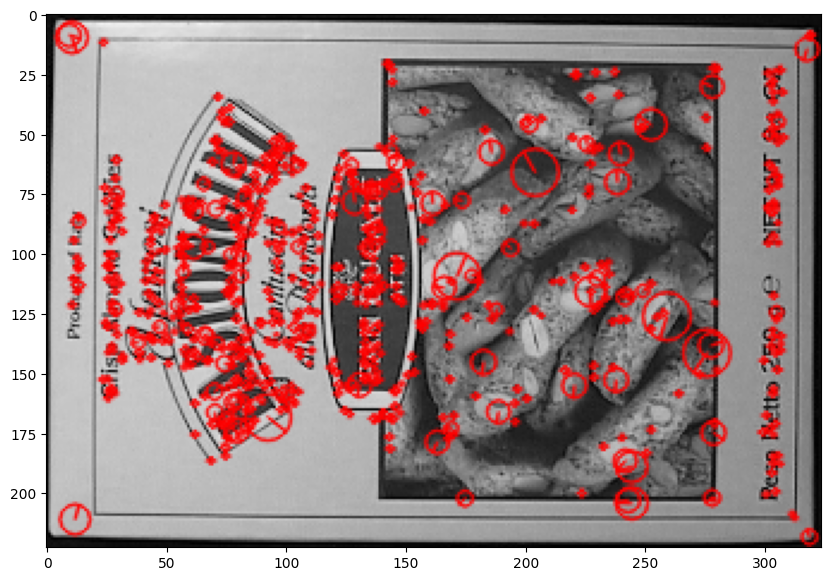

In [147]:
plt.figure(figsize=[10, 10])
plt.imshow(img_kp)